In [3]:
import numpy as np
import scipy.spatial
import copy
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc
from classes import Vertex, Edge, Polygon
from functions import *

from init_2D import edge_assignments_cell_1, edge_assignments_cell_2, polygon_assignments,gen_rnd_2D





In [5]:
cos_30=3**(1/2)/2
l=1
p=[[l/2,0],[l,l*cos_30],[l/2,2*l*cos_30]]
q=[[2*l,l*cos_30],[5*l/2,0]]

Polygon.a_0=np.mean([poly.area() for poly in polygon_assignments(p,q)])
Polygon.k_a=10000

print(Polygon.a_0)


2.5980762113533156


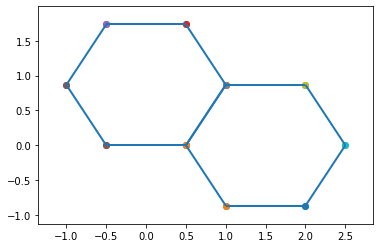

In [11]:
cell_1=edge_assignments_cell_1(p,q)

cell_2=edge_assignments_cell_2(p,q)

total=np.concatenate((cell_1,cell_2),axis=0)

#plotter_3D(total)

plotter_2D(total)


In [12]:

def vertex_monte_carlo(l,p,q,epsilon,trials,state=None):
    n=0
    pf,qf=gen_rnd_2D(l,p,q,epsilon,state)
   
    energy=2*np.sum([p.energy() for p in polygon_assignments(pf,qf,state)])
    while n<trials:
        pt,qt=gen_rnd_2D(l,p,q,epsilon,state)
        
        
        energy_t=2*np.sum([p.energy() for p in polygon_assignments(pt,qt,state)])
        if energy_t<energy:
            pf=copy.deepcopy(pt)
            qf=copy.deepcopy(qt)
            
            energy=energy_t
        n+=1
    
    return pf,qf,energy

How the randomized evolution process works:

(i) Start with the initial configuration of generator points.
(ii) Feed in a prescription for how edges between generator points (and perhaps their reflections) should connected by edges. Additionally, feed in prescriptions for how these edges make up polygons (and in 3D, how these polygons further make up polyhedrons.)
(iii) The first half of a driven neighbor exchange drives involves driving an edge to a length of 0 (and in 3D, a polygon to an area of 0). This is achieved by driving the generator point(s) for this edge (polygon) on a predetermined path. Implement a infinitesimal change  for these generator points along the path.
(iii) Add small, random-valued changes to all the other generators points. Note that, to preserve spatial symmetries during the transition, some components of some generator points should remain unchanged.
(iv) Keep checking the corresponding new configuration for the lowest energy one. In this project we place a high cost on area(volume) deformations by magnifying the corresponding stiffness constant; so the smallest cost is (possibly) via preserving area. Pick the smallest energy configuration you can find within a given number of trials. 
(v)  Repeat the process until the the neighbour-separating edge/polygon has shrunk to zero.
(vi) The second-half of the neighbor exchange involves separating out the old neighbours. This requires some edge (and polygon and polyhedron) represecription. Upon represction, the rest of the process is similar.

---

This randomizer needs a string input on whether to change to x- or y- value of p0.

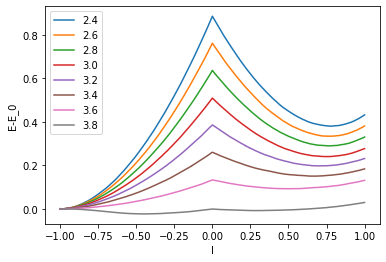

In [16]:
cos_30=3**(1/2)/2
l=1
array,epsilon=np.linspace(l,0,10000,retstep=True)



fig=plt.figure()
for p_0 in np.linspace(2.4,3.8,8):
    Polygon.p_0=p_0
    x=[]
    energy=[]

    p=[[l/2,0],[l,l*cos_30],[l/2,2*l*cos_30]]
    q=[[2*l,l*cos_30],[5*l/2,0]]
    #counter=0
    for length in array:
        pf,qf,e=vertex_monte_carlo(length,p,q,epsilon,10,None)
        #print("Energy=",e)
        energy.append(e)
        x.append(-length)
        p=copy.deepcopy(pf)
        q=copy.deepcopy(qf)
        
        #counter+=1
        #if counter%10==0:
        #    print(length)
        #    #print(p,q)
        #    print("Energy=",e)
        #    plotter_2D(np.concatenate(edge_assignments(p,q),axis=0))
        #    plt.show()
    
    #counter=0
    for length in reversed(array):
        pf,qf,e=vertex_monte_carlo(length,p,q,epsilon,10,"post")
    #print("Energy=",e)
        energy.append(e)
        x.append(length)
        p=copy.deepcopy(pf)
        q=copy.deepcopy(qf)
    #    counter+=1
    #    if counter%10==0:
    #        print(length)
    #        print(p,q)
    #        print("Energy=",e)
    #        plotter_2D(np.concatenate(edge_assignments(p,q,"post"),axis=0))
    #        plt.show()
    plt.plot(x,np.subtract(energy,np.full(len(energy),energy[0])),label=round(p_0,2) )

plt.legend()
plt.xlabel("l")
plt.ylabel("E-E_0")
plt.show()
#plt.savefig("Figures/2D/transition_2D.png",dpi=1080,bbox_inches="tight",transparent=False)
#plt.close(fig)

In [ ]:
counter=0
for length in reversed(array):
    pf,qf,e=vertex_monte_carlo(length,p,q,epsilon,"post",100)
    #print("Energy=",e)
    energy.append(e)
    x.append(length)
    p=copy.deepcopy(pf)
    q=copy.deepcopy(qf)
    counter+=1
    if counter%10==0:
        print(length)
        #print(p,q)
        print("Energy=",e)
        plotter_2D(np.concatenate(edge_assignments(p,q,"post"),axis=0))

In [14]:
np.linspace(2.3,3.7,8)

array([2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7])